In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return 1/(1 + x**2)

In [3]:
def trapeze(f, a, b, N): 
    result = 0
    step = (b - a) / N
    for i in range(N):
        a = i * step
        b = (i + 1) * step
        result += (f(a) + f(b)) * step * 0.5
    return result

def simpson(f, a, b, N):
    result = 0
    step = (b - a) / N
    for i in range(N):
        a = i * step
        b = (i + 1) * step
        result += (f(a) + 4*f((a + b)/2) + f(b)) * step / 6
    return result

In [4]:
trapeze_result = trapeze(f1, 0, 1, 10)
simpson_result = simpson(f1, 0, 1, 10)
analitic = np.arctan(1)
print(f"{trapeze_result=}")
print(f"{simpson_result=}")
print(f"{analitic=}")

trapeze_result=0.7849814972267897
simpson_result=0.7853981632424463
analitic=0.7853981633974483


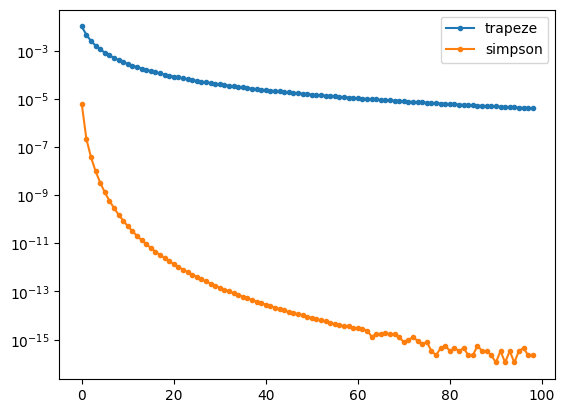

In [5]:
N = 100
error_t = np.zeros(N-1)
error_s = np.zeros(N-1)
for i in range(0, N):
    error_t[i-1] = np.abs(trapeze(f1, 0, 1, i+1) - analitic) 
    error_s[i-1] = np.abs(simpson(f1, 0, 1, i+1) - analitic) 
plt.plot(error_t, marker='.', label='trapeze')
plt.plot(error_s, marker='.', label='simpson')
plt.legend()
plt.yscale('log')
plt.show()

In [6]:
from math import exp, sin
def f2(x):
    return x**(1/3)*exp(sin(x))

In [7]:
trapeze_result = trapeze(f2, 0, 1, 100)
simpson_result = simpson(f2, 0, 1, 100)
print(f"{trapeze_result=}")
print(f"{simpson_result=}")

trapeze_result=1.2952925176412804
simpson_result=1.2957570737817456
